### CCE Data - Preliminary data cleanup and MDS plots  
Authors: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
Edited by:    <br>
Input file format: .csv files directly from github <br> 
Outputs: .csv files and .svg files(plots) <br>
Dependencies: ggplot2, dplyr, ecodist, RcolorBrewer, svglite

In [ ]:
# Install the needed packages:

#install.packages(c("dplyr","ggplot2","vegan","RColorBrewer","svglite"))

In [1]:
# calling the libraries:
library(dplyr)
library(ggplot2)
library(vegan) #For PcoA using Bray-Curtis distance
library(RColorBrewer) # to use Colorblindness-friendly colors
library(svglite) # for saving ggplots as svg

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'vegan' was built under R version 3.6.3"Loading required package: permute
Loading required package: lattice
This is vegan 2.5-7
Warning message:
"package 'svglite' was built under R version 3.6.3"

In [34]:
#'Global' settings for plot size in the output cell
options(repr.plot.width=10, repr.plot.height=8,res=600) #For google collab

The following code creates a new folder 'My_TestData' in the Colab space and sets the folder as working directory. 

In [ ]:
#For Google Colab:
dir.create("/content/My_TestData", showWarnings = TRUE, recursive = FALSE, mode = "0777")
setwd("/content/My_TestData")

#For Jupyter Notebook you can set your local folder as working directory

## 1) Reading the input data using URL (from GitHub):

In [24]:
# Directly calling the files from the github account:
ft_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/NewFiles_Oct2022/CCE1706_MZmine3_GNPS_fixed_quant.csv"
md_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/raw%20files/metadata_CCE.csv"

## 2) Uploading the files to the Colab environment:
<p style='text-align: justify;'> <font color='red'>For Google Colab, it is not possible to access the files from your local computer as it is hosted on Google's cloud server. An easier workaround is to upload the necessary files into the Google colab session using the 'Files' icon on the left as shown in the image. Following the steps in the image, you can check in your Colab to see if the folder has been created. Once you see it, simply upload the files from your local PC to the folder 'My_TestData' and then continue running the rest of the script.</font> </p>

<p style='text-align: justify;'>SPECIAL NOTE: All the files uploaded to Google Colab would generally disappear after 12 hours. Similarly, all the outputs would be saved only in the Colab, so we need to download them into our local system at the end of our session.</p> 

[Go to section: Getting outputs from Colab](#colab_output) 

![Google-Colab Files Upload](https://github.com/abzer005/Images-for-Jupyter-Notebooks/blob/main/StepsAll.png?raw=true)

After uploading the files, you can also copy the path of the files by right-clicking on it and read the files using URL

In [25]:
ft <- read.csv(ft_url, header = T, check.names = F)
md <- read.csv(md_url, header = T, check.names = F)

In [20]:
head(ft)
dim(ft)

row ID,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,...,CCE_P1706_265_MSMS.mzXML Peak area,CCE_P1706_277_MSMS.mzXML Peak area,CCE_P1706_274_MSMS.mzXML Peak area,CCE_P1706_278_MSMS.mzXML Peak area,CCE_P1706_282_MSMS.mzXML Peak area,CCE_P1706_281_MSMS.mzXML Peak area,CCE_P1706_280_MSMS.mzXML Peak area,CCE_P1706_284_MSMS.mzXML Peak area,CCE_P1706_283_MSMS.mzXML Peak area,
2492,150.1278,2.6763387,NA,NA,NA,NA,NA,,NA,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA
129,151.0352,0.5501945,NA,NA,NA,42,0,[M+NH4]+,NA,...,825927.80,41523.44,234371.4,379528.4,282609.8,618307.2,542946.1,497668.8,300027.5,NA
1112,151.0354,0.8179372,NA,NA,NA,NA,NA,,NA,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA
3075,151.0727,2.8642000,NA,NA,NA,NA,NA,,NA,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA
542,152.0569,0.8361905,NA,NA,NA,NA,NA,,NA,...,25805.85,21533.63,0.0,33309.2,0.0,0.0,0.0,449260.9,73446.8,NA
31563,152.9949,8.7610170,NA,NA,NA,NA,NA,,NA,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NA


[1] 10644   317

In [26]:
head(md)
dim(md)

filename,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
Blank_CCE_P1706_1.mzxml,0.0,0.0,0.0,1,Blank,1,20170602,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Blank_CCE_P1706_2.mzxml,0.0,0.0,0.0,1,Blank,2,20170602,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_3.mzxml,-80.1,85.1,101.5,1,Control,3,20170602,2,NA,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_4.mzxml,-80.1,85.1,101.5,1,Control,4,20170602,2,NA,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_5.mzxml,-80.1,85.1,102.5,1,Control,5,20170602,2,NA,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0
CCE_P1706_6.mzxml,-80.1,85.1,102.5,1,Control,6,20170602,2,NA,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0


[1] 230  33

In [27]:
# Arranging the metadata table in the right format for further analysis:
md <- md[,colSums(is.na(md))<nrow(md)] #removing NA columns in md, if any present
rownames(md) <- md$filename 
md <- md[,-1]
rownames(md) <- gsub('Blank_','',rownames(md)) # Removing "Blank" in the 1st two row names of md

In [29]:
head(md)
dim(md)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
CCE_P1706_1.mzxml,0.0,0.0,0.0,1,Blank,1,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_2.mzxml,0.0,0.0,0.0,1,Blank,2,20170602,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
CCE_P1706_3.mzxml,-80.1,85.1,101.5,1,Control,3,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_4.mzxml,-80.1,85.1,101.5,1,Control,4,20170602,2,NA,2,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
CCE_P1706_5.mzxml,-80.1,85.1,102.5,1,Control,5,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0
CCE_P1706_6.mzxml,-80.1,85.1,102.5,1,Control,6,20170602,2,NA,4,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0


[1] 230  32

In [30]:
# Arranging the feature table in the right format for further analysis:
new_ft <- ft[,grep('mzXML',colnames(ft))] # only picking mzXML files
new_ft <- new_ft[,-grep('_STKL',colnames(new_ft))] # excluding the STKL columns
colnames(new_ft) <- gsub('_MSMS.mzXML Peak area','.mzxml',colnames(new_ft))  #substituting the file extension in the colnames of new_ft with mzxml
rownames(new_ft) <- paste(ft$'row ID',round(ft$'row m/z',digits = 3),round(ft$'row retention time',digits = 3), sep = '_') #Taking row ID, m/z value and RT of ft as the rownames of new_ft

new_ft <- new_ft[,order(colnames(new_ft))] #ordering the columns by names
new_ft <- new_ft[,-1] # Removing the column "Brandon_Deep_DOM"

In [31]:
head(new_ft)
dim(new_ft)

,CCE_P1706_1.mzxml,CCE_P1706_10.mzxml,CCE_P1706_100.mzxml,CCE_P1706_101.mzxml,CCE_P1706_102.mzxml,CCE_P1706_103.mzxml,CCE_P1706_104.mzxml,CCE_P1706_105.mzxml,CCE_P1706_106.mzxml,CCE_P1706_107.mzxml,...,CCE_P1706_90.mzxml,CCE_P1706_91.mzxml,CCE_P1706_92.mzxml,CCE_P1706_93.mzxml,CCE_P1706_94.mzxml,CCE_P1706_95.mzxml,CCE_P1706_96.mzxml,CCE_P1706_97.mzxml,CCE_P1706_98.mzxml,CCE_P1706_99.mzxml
2492_150.128_2.676,0.0,1337.194,0.0,8415.840,22316.707,40567.03,17755.25,119876.21,118901.73,122989.410,...,8197.102,7241.997,20743.127,112435.09,75191.27,107497.875,92426.99,49876.23,97060.14,24065.312
129_151.035_0.55,15609.8,999584.800,559469.1,487509.600,560113.800,635746.75,1000052.00,1212248.20,1164555.50,831102.100,...,1065020.000,633593.100,917026.940,1883787.80,930258.10,794617.250,1169785.90,612202.20,771153.70,318676.600
1112_151.035_0.818,0.0,0.000,0.0,0.000,0.000,0.00,0.00,0.00,0.00,0.000,...,0.000,0.000,0.000,16823.78,0.00,0.000,0.00,0.00,0.00,0.000
3075_151.073_2.864,0.0,0.000,0.0,0.000,0.000,0.00,0.00,0.00,0.00,0.000,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.000
542_152.057_0.836,0.0,0.000,0.0,5143.844,2989.541,18357.04,11901.30,11663.85,30994.83,4605.688,...,7997.574,15332.245,9705.084,41021.48,14017.55,3179.444,10420.50,16618.81,17211.43,2053.619
31563_152.995_8.761,467020.4,0.000,0.0,0.000,0.000,0.00,0.00,0.00,0.00,0.000,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.000


[1] 10644   284

In [32]:
#picking only the columns in new_ft that are comparable to rownames of md
ft_final <- new_ft[,which(colnames(new_ft)%in%rownames(md))] 

#returns the matched position of rownames of md to that of colnames of new_ft
ft_final  <- new_ft[,match(rownames(md),colnames(new_ft))] 

#checking if the colnames of ft_final and rownames of md matched. Should return TRUE
identical(colnames(ft_final),rownames(md)) 

[1] TRUE

In [33]:
dim(ft_final)
dim(md)

[1] 10644   230

[1] 230  32

The dimensions show that nrow(ft_final)=ncol(md), thus eligible for matrix multiplication. Therefore, we can apply several calculations on these tables such as PCA etc.

In [35]:
#Loading in the helper functions from the additional R script:
source('https://raw.githubusercontent.com/Functional-Metabolomics-Lab/ChemProp2/main/Helper_functions_Chemprop2.r')

## 1) Blank Removal:

<p style='text-align: justify;'> In LC-MS/MS, we use solvents called Blanks which are usually injected time-to-time to prevent carryover of the sample. The features coming from these Blanks would also be detected by LC-MS/MS instrument. Our goal here is to remove these features from our samples. The other blanks that can be removed are: Signals coming from growth media alone in terms of microbial growth experiment, signals from the solvent used for extraction methods and so on. Therefore, it is best practice to measure mass spectra of these blanks as well in addition to your sample spectra. </p>

**How do we remove these blank features?** </br> 
<p style='text-align: justify;'> Since we have the feature table split into Control blanks and Sample groups now, we can compare blanks to the sample to identify the background features coming from blanks. A common filtering method is to use a cutoff to remove features that are not present sufficient enough in our biological samples. </p>

The steps followed in the next few cells are:
1. <p style='text-align: justify;'> We find an average for all the feature intensities in your blank set and sample set. Therefore, for n no.of features in a blank or sample set, we get n no.of averaged features. </p>
2. <p style='text-align: justify;'> Next, we get a ratio of this average_blanks vs average_sample. This ratio Blank/sample tells us how much of that particular feature of a sample gets its contribution from blanks. If it is more than 30% (or Cutoff as 0.3), we consider the feature as noise. </p>
3. <p style='text-align: justify;'> The resultant information (if ratio > Cutoff or not) is stored in a bin such as 1 = Noise or background signal, 0 = Feature Signal</p>
4. <p style='text-align: justify;'> We count the no.of features in the bin that satisfies the condition ratio > cutoff, and consider those features as 'noise or background features' and remove them. </p>

For a dataset containing several groups, the filtering steps are performed group-wise using the previous section [Subsetting the dataset](#data_split)

In [36]:
#Splitting the samples: 
Blank <-  ft_final[,1:2]
Samples <- ft_final[,-1:-2]

For the code below, <font color='red'> I gave a cutoff value: 0.3 </font>

In [37]:
input_data <- ft_final

#When cutoff is low, more noise (or background) detected; With higher cutoff, less background detected, thus more features observed
Cutoff <- as.numeric(readline('Enter Cutoff value between 0.1 & 1:')) # (i.e. 10% - 100%). Ideal cutoff range: 0.1-0.3
    
#Getting mean for every feature in blank and Samples
Avg_blank <- rowMeans(Blank, na.rm= FALSE, dims = 1) # set na.rm = FALSE to check if there are NA values. When set as TRUE, NA values are changed to 0
Avg_samples <- rowMeans(Samples, na.rm= FALSE, dims = 1)
    
    #Getting the ratio of blank vs Sample
Ratio_blank_Sample <- (Avg_blank+1)/(Avg_samples+1)
    
    # Creating a bin with 1s when the ratio>Cutoff, else put 0s
Bg_bin <- ifelse(Ratio_blank_Sample > Cutoff, 1, 0 )
Blank_removal <- cbind(Samples,Bg_bin)

# Checking if there are any NA values present. Having NA values in the 4 variables will affect the final dataset to be created
temp_NA_Count <-cbind(Avg_blank ,Avg_samples,Ratio_blank_Sample,Bg_bin)
    
print('No of NA values in the following columns:')
print(colSums(is.na(temp_NA_Count)))

#Calculating the number of background features and features present
print(paste("No.of Background or noise features:",sum(Bg_bin ==1,na.rm = TRUE)))
print(paste("No.of features after excluding noise:",(nrow(Samples) - sum(Bg_bin ==1,na.rm = TRUE)))) 

Blank_removal <- Blank_removal %>% filter(Bg_bin == 0) # Taking only the feature signals
Blank_removal <- as.matrix(Blank_removal[,-ncol(Blank_removal)]) # removing the last column Bg_bin}

Enter Cutoff value between 0.1 & 1:0.3
[1] "No of NA values in the following columns:"
         Avg_blank        Avg_samples Ratio_blank_Sample             Bg_bin 
                 0                  0                  0                  0 
[1] "No.of Background or noise features: 1914"
[1] "No.of features after excluding noise: 8730"


In [38]:
write.csv(Blank_removal, file.path(fName,paste0('Blank_removed.csv')),row.names =TRUE) 

ERROR: Error in file.path(fName, paste0("Blank_removed.csv")): object 'fName' not found


In [39]:
head(Blank_removal)
dim(Blank_removal)

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
2492_150.128_2.676,0.000,0.000,0.000,0.0000,0.0,0,0.00,1337.194,0.000,0.000,...,0.000,0.000,4783.693,0.000,136697.110,142275.33,113561.860,143732.620,150891.560,123942.460
129_151.035_0.55,455805.560,672941.750,186709.800,485330.4400,264000.8,293111,537367.06,999584.800,679319.400,336311.030,...,347073.120,201420.060,408543.380,432103.970,999241.900,92304.02,594603.300,803871.900,203177.280,166361.670
1112_151.035_0.818,0.000,0.000,0.000,0.0000,0.0,0,0.00,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000
542_152.057_0.836,4415.534,1926.449,8342.961,936.0278,0.0,0,0.00,0.000,0.000,0.000,...,8539.449,3733.954,13579.870,9147.111,8338.514,5096.63,10714.362,4561.672,5311.413,3843.155
511_155.082_0.625,0.000,0.000,0.000,0.0000,0.0,0,13929.98,12415.050,8491.486,5317.869,...,14839.266,6180.206,18970.967,28609.256,0.000,0.00,4229.661,0.000,7910.029,5567.093
13525_155.107_4.872,0.000,0.000,0.000,0.0000,0.0,0,0.00,4192.176,0.000,0.000,...,0.000,0.000,0.000,0.000,35361.477,39394.75,47118.895,62969.270,72053.640,46585.330


[1] 8730  228

## 2) Imputation:
<p style='text-align: justify;'> For several reasons, real world datasets might have some missing values in it, in the form of NA, NANs or 0s. Eventhough the gapfilling step of MZmine fills the missing values, we still end up with some missing values or 0s in our feature table. This could be problematic for statistical analysis. </p> 
<p style='text-align: justify;'> In order to have a better dataset, we cannot simply discard those rows or columns with missing values as we will lose a chunk of our valuable data. Instead we can try imputing those missing values. Imputation involves replacing the missing values in the data with a meaningful, reasonable guess. There are several methods, such as: </p> 
  
1) Mean imputation (replacing the missing values in a column with the mean or average of the column)  
2) Replacing it with the most frequent value  
3) Several other machine learning imputation methods such as k-nearest neighbors algorithm(k-NN), Hidden Markov Model(HMM)

The method that we use is: Replacing the zeros from the gapfilled quant table with the Cutoff_LOD value.

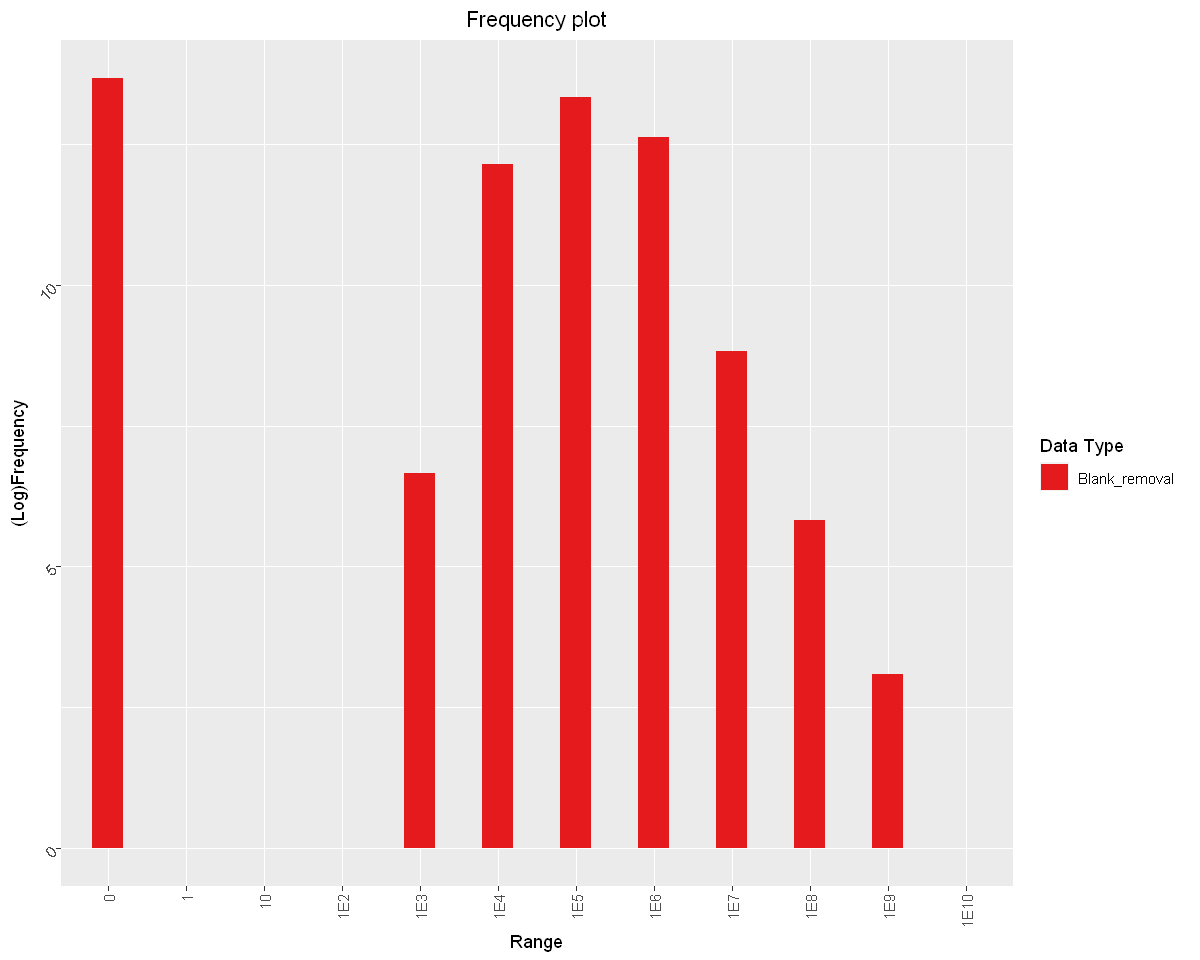

In [41]:
#This function takes in two input variables, 
#since we want to see the frequency distribution of only one dataframe, we have given it twice
FrequencyPlot(Blank_removal,Blank_removal) 

In [43]:
min_LOD <- round(min(Blank_removal[Blank_removal!=min(Blank_removal)]))
print(paste0("The minimum value greater than 0 in gap-filled table: ",min_LOD)) 

[1] "The minimum value greater than 0 in gap-filled table: 890"


For the code below, <font color='red'> I gave a LOD value: 1000 </font>

In [46]:
Cutoff_LOD <- as.numeric(readline("Enter your Cutoff LOD as seen in the plot or your desired value for imputation:"))  #Enter the LOD value as seen in the frequency plot
Imputed <- Blank_removal
Imputed[Imputed <Cutoff_LOD] <- Cutoff_LOD

Enter your Cutoff LOD as seen in the plot or your desired value for imputation:1000


In [47]:
head(Imputed)
dim(Imputed)

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
2492_150.128_2.676,1000.000,1000.000,1000.000,1000.0,1000.0,1000,1000.00,1337.194,1000.000,1000.000,...,1000.000,1000.000,4783.693,1000.000,136697.110,142275.33,113561.860,143732.620,150891.560,123942.460
129_151.035_0.55,455805.560,672941.750,186709.800,485330.4,264000.8,293111,537367.06,999584.800,679319.400,336311.030,...,347073.120,201420.060,408543.380,432103.970,999241.900,92304.02,594603.300,803871.900,203177.280,166361.670
1112_151.035_0.818,1000.000,1000.000,1000.000,1000.0,1000.0,1000,1000.00,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.00,1000.000,1000.000,1000.000,1000.000
542_152.057_0.836,4415.534,1926.449,8342.961,1000.0,1000.0,1000,1000.00,1000.000,1000.000,1000.000,...,8539.449,3733.954,13579.870,9147.111,8338.514,5096.63,10714.362,4561.672,5311.413,3843.155
511_155.082_0.625,1000.000,1000.000,1000.000,1000.0,1000.0,1000,13929.98,12415.050,8491.486,5317.869,...,14839.266,6180.206,18970.967,28609.256,1000.000,1000.00,4229.661,1000.000,7910.029,5567.093
13525_155.107_4.872,1000.000,1000.000,1000.000,1000.0,1000.0,1000,1000.00,4192.176,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,35361.477,39394.75,47118.895,62969.270,72053.640,46585.330


[1] 8730  228

In [ ]:
write.csv(Imputed,file.path(fName,paste0('Imputed_QuantTable_filled_with_',Cutoff_LOD,'_CutOff_Used_',Cutoff,'.csv')),row.names =T)

In [50]:
#removing all the rows with only cutoff values:
Imputed<-Imputed[rowMeans(Imputed)!= Cutoff_LOD,]  
dim(Imputed)

[1] 8728  228

## Normalization:
The following code performs sample-centric (column-wise) normalisation:

In [51]:
#Getting column-wise sums of the input-data
sample_sum <- colSums(Imputed, na.rm= T, dims = 1)
    
#Dividing each element of a particular column with its column sum
Normalized_data <- c()
for (i in 1:ncol(Imputed)){
  x <- Imputed[,i] / sample_sum[i]
  Normalized_data <- cbind(Normalized_data, x)
  }
colnames(Normalized_data) <- names(sample_sum)

head(Normalized_data)
dim(Normalized_data)
  
print(paste('No.of NA values in Normalized data:',sum(is.na(Normalized_data)== T)))

,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
2492_150.128_2.676,2.944340e-06,3.713911e-06,2.755100e-06,2.079366e-06,2.451506e-06,2.833271e-06,3.114749e-06,3.423295e-06,2.897854e-06,2.533450e-06,...,3.187455e-06,2.815861e-06,1.184907e-05,2.847519e-06,2.375023e-04,2.916633e-04,2.119933e-04,2.750841e-04,2.794033e-04,2.398616e-04
129_151.035_0.55,1.342047e-03,2.499246e-03,5.144041e-04,1.009180e-03,6.471996e-04,8.304628e-04,1.673763e-03,2.558995e-03,1.968569e-03,8.520273e-04,...,1.106280e-03,5.671709e-04,1.011950e-03,1.230424e-03,1.736118e-03,1.892225e-04,1.109984e-03,1.538498e-03,3.762198e-04,3.219541e-04
1112_151.035_0.818,2.944340e-06,3.713911e-06,2.755100e-06,2.079366e-06,2.451506e-06,2.833271e-06,3.114749e-06,2.560058e-06,2.897854e-06,2.533450e-06,...,3.187455e-06,2.815861e-06,2.476972e-06,2.847519e-06,1.737435e-06,2.049992e-06,1.866765e-06,1.913860e-06,1.851683e-06,1.935266e-06
542_152.057_0.836,1.300084e-05,7.154663e-06,2.298569e-05,2.079366e-06,2.451506e-06,2.833271e-06,3.114749e-06,2.560058e-06,2.897854e-06,2.533450e-06,...,2.721911e-05,1.051430e-05,3.363695e-05,2.604658e-05,1.448762e-05,1.044805e-05,2.000119e-05,8.730402e-06,9.835050e-06,7.437528e-06
511_155.082_0.625,2.944340e-06,3.713911e-06,2.755100e-06,2.079366e-06,2.451506e-06,2.833271e-06,4.338839e-05,3.178325e-05,2.460709e-05,1.347256e-05,...,4.729950e-05,1.740260e-05,4.699055e-05,8.146541e-05,1.737435e-06,2.049992e-06,7.895781e-06,1.913860e-06,1.464686e-05,1.077381e-05
13525_155.107_4.872,2.944340e-06,3.713911e-06,2.755100e-06,2.079366e-06,2.451506e-06,2.833271e-06,3.114749e-06,1.073222e-05,2.897854e-06,2.533450e-06,...,3.187455e-06,2.815861e-06,2.476972e-06,2.847519e-06,6.143826e-05,8.075891e-05,8.795989e-05,1.205144e-04,1.334205e-04,9.015501e-05


[1] "No.of NA values in Normalized data: 0"


In [ ]:
write.csv(Normalized_data, file.path(fName,'Normalised_Quant_table.csv'),row.names =T)

## MDS Plots
The goal of Multi-Dimensional scaling (MDS) is to visualize multivariate data in 2D plots

In [52]:
InsideLevels(md)

INDEX,ATTRIBUTES,LEVELS,TYPE
1,ATTRIBUTE_x,"-144.48, -141.43, -141.36, -139.64, -138.45, -137.49, -133.28, -131.54, -131.13, -129.43, -127.57, -125.8, -124.79, -123.16, -122.74, -119.8, -116.71, -112.5, -111.48, -110.46, -109.54, -108.24, -103.98, -103.52, -101.42, -80.1, 0",numeric
2,ATTRIBUTE_y,"0, 74.72, 79.72, 80.97, 81.81, 83.91, 84.87, 85, 85.1, 86.96, 88.65, 88.87, 91.97, 92.15, 93.12, 93.14, 93.15, 95.02, 96.16, 97.2, 99.17, 99.24, 100, 101.96, 102.23, 103.79, 105",numeric
3,ATTRIBUTE_z,"0, 101.5, 102.5, 103.5, 109.44, 110.44, 111.44, 111.88, 112.34, 112.79",numeric
4,ATTRIBUTE_Spot_size,1,integer
5,ATTRIBUTE_Filament_Possition,"Blank, Control, Cycle_1, Cycle_2, Cycle_3, Cycle_4, Middle, Outside",factor
6,ATTRIBUTE_Sample_Number,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230",integer
7,ATTRIBUTE_Date,"20170602, 20170607, 20170608, 20170609, 20170610, 20170611, 20170613, 20170614, 20170615, 20170616, 20170617, 20170618, 20170619, 20170620, 20170621, 20170622, 20170623, 20170624, 20170625",integer
8,ATTRIBUTE_Cast,"2, 4, 6, 8, 10, 12, 16, 20, 23, 26, 30, 32, 34, 37, 39, 43, 45, 47, 49, 53, 55, 58, 63, 68, 70, 74",integer
9,ATTRIBUTE_Event_Number,"130, 154, 168, 216, 246, 270, 312, 341, 364, 407, 419, 443, 456, 468, 490, 523, 550, 595, 622, 649, 688",integer
10,ATTRIBUTE_Bottle,"2, 4, 6, 8, 9, 10, 12, 14, 16, 18, 19, 20, 21, 23, 24",integer


In [122]:
#excluding Blanks from md and some other filtering conditions
md_pcoa <-  md %>% filter(ATTRIBUTE_Filament_Possition != 'Blank',
                           ATTRIBUTE_Location!= 'Santa_Barbara_Basin',
                           ATTRIBUTE_Location!='Transcet_1',
                           ATTRIBUTE_Location!='Transcet_2',
                           ATTRIBUTE_Location!='Transect_3',
                           ATTRIBUTE_Depth <= 20 ) 

# the corresponding column files for the filtered MetaData is picked from the normalized data
ft_pcoa <- Normalized_data[,which(colnames(Normalized_data)%in%rownames(md_pcoa))] 

In [123]:
head(ft_pcoa)
dim(ft_pcoa)

,CCE_P1706_47.mzxml,CCE_P1706_48.mzxml,CCE_P1706_49.mzxml,CCE_P1706_50.mzxml,CCE_P1706_59.mzxml,CCE_P1706_60.mzxml,CCE_P1706_61.mzxml,CCE_P1706_62.mzxml,CCE_P1706_69.mzxml,CCE_P1706_70.mzxml,...,CCE_P1706_187.mzxml,CCE_P1706_188.mzxml,CCE_P1706_215.mzxml,CCE_P1706_216.mzxml,CCE_P1706_217.mzxml,CCE_P1706_218.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
2492_150.128_2.676,8.670625e-06,4.245170e-06,9.190230e-06,1.084894e-05,1.782943e-06,1.069102e-06,3.257683e-06,2.977807e-06,5.012059e-05,3.955416e-05,...,3.498566e-05,2.359463e-05,2.510278e-04,2.937796e-04,2.984683e-04,2.459207e-04,2.119933e-04,2.750841e-04,2.794033e-04,2.398616e-04
129_151.035_0.55,1.195235e-03,4.012467e-04,7.495743e-04,6.996023e-04,3.301421e-04,4.687402e-04,3.446590e-04,5.588574e-04,6.894077e-04,9.079433e-04,...,8.926696e-04,8.181439e-04,6.985525e-04,2.138317e-04,1.663312e-04,9.182741e-04,1.109984e-03,1.538498e-03,3.762198e-04,3.219541e-04
1112_151.035_0.818,1.062615e-06,8.982189e-07,8.256190e-07,8.223779e-07,7.229228e-07,1.069102e-06,6.369610e-07,6.921318e-07,1.169837e-06,1.149381e-06,...,2.049257e-06,1.851051e-06,1.887877e-06,2.049876e-06,1.612321e-06,1.553123e-06,1.866765e-06,1.913860e-06,1.851683e-06,1.935266e-06
542_152.057_0.836,7.908463e-06,4.007658e-05,3.047570e-05,2.472637e-05,3.264741e-05,9.403560e-06,1.010462e-05,7.253504e-06,7.040372e-06,4.004166e-05,...,2.817892e-05,1.787785e-05,2.273126e-05,1.703797e-05,9.299910e-06,2.262474e-05,2.000119e-05,8.730402e-06,9.835050e-06,7.437528e-06
511_155.082_0.625,1.443259e-05,1.194189e-05,2.596150e-06,6.216690e-06,1.336055e-05,5.981124e-05,3.429143e-05,3.268128e-05,3.901872e-05,2.609060e-05,...,6.982707e-06,1.851051e-06,2.968502e-05,2.370437e-05,1.202341e-05,1.553123e-06,7.895781e-06,1.913860e-06,1.464686e-05,1.077381e-05
13525_155.107_4.872,3.358037e-05,1.594559e-05,2.725242e-05,2.136175e-05,8.751293e-06,3.632602e-05,2.543966e-05,3.089626e-05,3.567295e-05,1.792733e-05,...,1.202198e-05,1.851051e-06,1.074284e-04,1.411630e-04,9.451492e-05,4.524809e-05,8.795989e-05,1.205144e-04,1.334205e-04,9.015501e-05


[1] 8728   56

In [124]:
head(md_pcoa)
dim(md_pcoa)

,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,ATTRIBUTE_Bottle,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
CCE_P1706_47.mzxml,-101.419,101.956,112.344,1,Cycle_1,47,20170609,16,216,20,...,73.62961,70_80,0.893,0.272,10.750,0.331,0.9,0.3,11,0.3
CCE_P1706_48.mzxml,-101.419,101.956,112.344,1,Cycle_1,48,20170609,16,216,20,...,73.62961,70_80,0.893,0.272,10.750,0.331,0.9,0.3,11,0.3
CCE_P1706_49.mzxml,-101.419,101.956,112.786,1,Cycle_1,49,20170609,16,216,23,...,78.27125,70_80,0.682,0.233,7.773,0.304,0.7,0.2,8,0.3
CCE_P1706_50.mzxml,-101.419,101.956,112.786,1,Cycle_1,50,20170609,16,216,23,...,78.27125,70_80,0.682,0.233,7.773,0.304,0.7,0.2,8,0.3
CCE_P1706_59.mzxml,-103.515,100.003,112.344,1,Cycle_1,59,20170610,20,246,21,...,86.51644,80_90,0.418,0.218,5.023,0.387,0.4,0.2,5,0.4
CCE_P1706_60.mzxml,-103.515,100.003,112.344,1,Cycle_1,60,20170610,20,246,21,...,86.51644,80_90,0.418,0.218,5.023,0.387,0.4,0.2,5,0.4


[1] 56 32

In [126]:
#For PCA plots, use Euclidean distance:
#dist_matrix <- dist(t(ft_pcoa), method = "euclidean")

#For PCoA plots using Bray-curtis distance:
dist_matrix <- vegdist(t(ft_pcoa), method = "bray")# compute distance # transposed in order to compute the distance between the columns of a data matrix

In [127]:
pcoa<- cmdscale(dist_matrix, eig = TRUE, x.ret=TRUE)
pcoa.var.per <-round(pcoa$eig/sum(pcoa$eig)*100,1)
pcoa.values <- pcoa$points
pcoa.data <- data.frame(MetaData$ATTRIBUTE_Depth_Range,
                        X=pcoa.values[,1],
                        Y=pcoa.values[,2])

In [128]:
#Corresponding colors used for each cycle:
#"Cycle1_Day1" = "#8B1A1A","Cycle1_Day2" = "#CD2626","Cycle1_Day3" = "#FF3030",
#"Cycle2_Day1" = "#2E8B57","Cycle2_Day2" = "#43CD80","Cycle2_Day3" = "#4EEE94","Cycle2_Day4" = "#54FF9F",
#"Cycle3_Day1" = "#7A378B","Cycle3_Day2" = "#B452CD","Cycle3_Day3" = "#D15FEE"
#"Cycle4_Day1" = "#1874CD","Cycle4_Day2" = "#1E90FF",

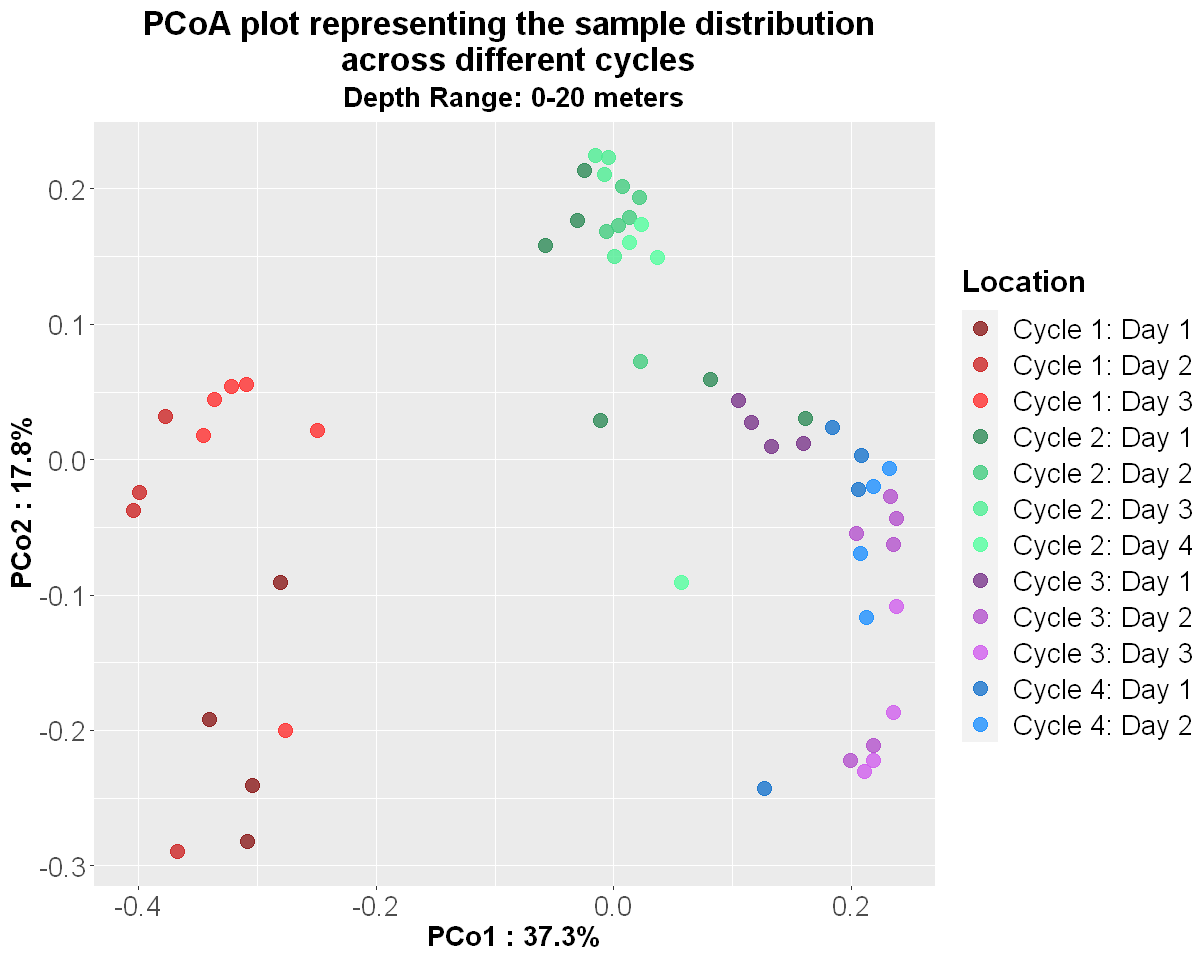

In [129]:
Plot <- ggplot(pcoa.data, aes(x=X, y=Y, col= as.factor(MetaData$ATTRIBUTE_Location))) + 
  geom_point(size=4,alpha=0.8)  +
  ggtitle(label="PCoA plot representing the sample distribution \n across different cycles") +
  xlab(paste0("PCo1 : ",pcoa.var.per[1],"%",sep="")) + 
  ylab(paste0("PCo2 : ",pcoa.var.per[2],"%",sep="")) + 
  labs(color = "Location") +  #theme(element_text(size = 22, face= 'bold',hjust=0.5))+
  theme(axis.text = element_text(size = 16),
         axis.title = element_text(size = 16, face= 'bold'),
         plot.title = element_text(size = 20, face= 'bold',hjust=0.5),
         plot.subtitle = element_text(size = 16, face= 'bold',hjust=0.5),
         legend.title = element_text(size = 18, face= 'bold'),
         legend.text = element_text(size = 16)) +
  scale_colour_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                       "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                       "#7A378B","#B452CD","#D15FEE",
                                       "#1874CD","#1E90FF"),
                           labels=c("Cycle 1: Day 1",
                                    "Cycle 1: Day 2",
                                    "Cycle 1: Day 3",
                                    "Cycle 2: Day 1",
                                    "Cycle 2: Day 2",
                                    "Cycle 2: Day 3",
                                    "Cycle 2: Day 4",
                                    "Cycle 3: Day 1",
                                    "Cycle 3: Day 2",
                                    "Cycle 3: Day 3",
                                    "Cycle 4: Day 1",
                                    "Cycle 4: Day 2"))+
  labs(subtitle = 'Depth Range: 0-20 meters') +
  theme(legend.key.size = unit(1.5, 'lines'))
Plot

In [103]:
ggsave(file="111022_PCoA_Depth_0_20_8000_features.svg", plot=Plot, width=10, height=8)
dev.off()

null device 
          1

# Do not forget to download the output files from the Colab environment !!